C:\Users\hrahm\AppData\Local\Temp\ipykernel_21040\198976122.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['OverTime'] = le.fit_transform(features['OverTime'])
C:\Users\hrahm\AppData\Local\Temp\ipykernel_21040\198976122.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['MonthlyIncome', 'JobSatisfaction']] = scaler.fit_transform(



Model Performance:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       173
         1.0       0.36      0.31      0.33        39

    accuracy                           0.77       212
   macro avg       0.61      0.59      0.60       212
weighted avg       0.76      0.77      0.77       212



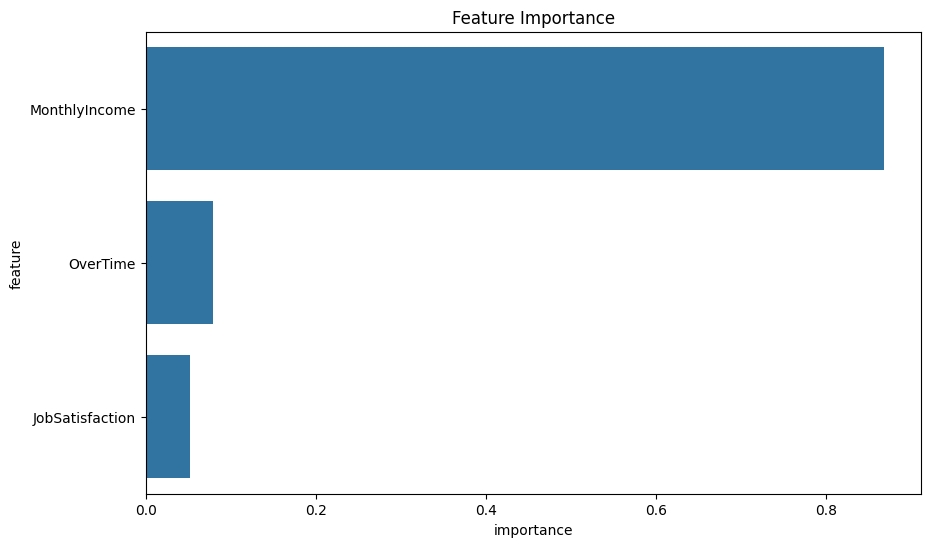


Prediction for new employee:
Attrition Risk: No
Probability of leaving: 6.00%


In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
def prepare_data(csv_path):
    df = pd.read_csv(csv_path)
    df_cleaned = df.dropna(subset=['Attrition'])
    
    # Select features
    features = df_cleaned[['MonthlyIncome', 'OverTime', 'JobSatisfaction']]
    target = df_cleaned['Attrition']
    
    # Encode categorical variables
    le = LabelEncoder()
    features['OverTime'] = le.fit_transform(features['OverTime'])
    
    # Scale numerical features
    scaler = StandardScaler()
    features[['MonthlyIncome', 'JobSatisfaction']] = scaler.fit_transform(
        features[['MonthlyIncome', 'JobSatisfaction']]
    )
    
    return features, target, scaler

# Train model
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print("\nModel Performance:")
    print(classification_report(y_test, y_pred))
    
    return model, X_test, y_test

# Plot feature importance
def plot_importance(model, feature_names):
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importances)
    plt.title('Feature Importance')
    plt.show()
    
# Prediction function
def predict_attrition(model, scaler, income, overtime, satisfaction):
    new_data = pd.DataFrame({
        'MonthlyIncome': [income],
        'OverTime': [overtime],
        'JobSatisfaction': [satisfaction]
    })
    
    new_data[['MonthlyIncome', 'JobSatisfaction']] = scaler.transform(
        new_data[['MonthlyIncome', 'JobSatisfaction']]
    )
    
    prediction = model.predict(new_data)[0]
    probability = model.predict_proba(new_data)[0]
    
    return prediction, probability

# Main execution
if __name__ == "__main__":
    # Prepare data
    X, y, scaler = prepare_data('employee_data.csv')
    
    # Train and evaluate model
    model, X_test, y_test = train_model(X, y)
    
    # Plot feature importance
    plot_importance(model, X.columns)
    
    # Example prediction
    income = 5000
    overtime = 1  # Yes
    satisfaction = 3
    
    prediction, probability = predict_attrition(model, scaler, income, overtime, satisfaction)
    print(f"\nPrediction for new employee:")
    print(f"Attrition Risk: {'Yes' if prediction else 'No'}")
    print(f"Probability of leaving: {probability[1]:.2%}")

C:\Users\hrahm\AppData\Local\Temp\ipykernel_21040\789082626.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSatisfaction'], palette="viridis")


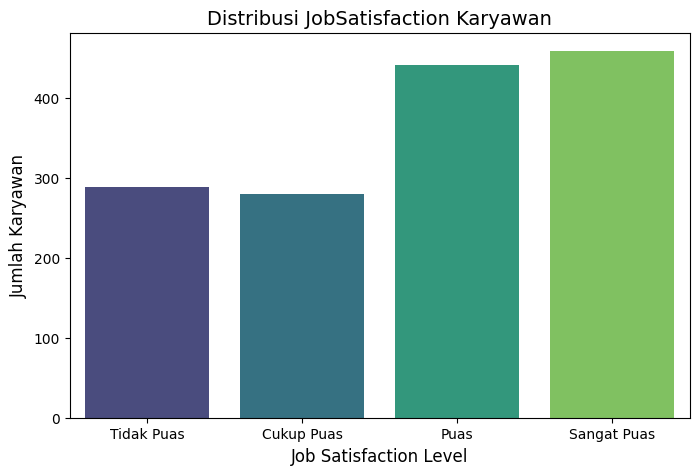

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('employee_data.csv')

# Plot distribusi JobSatisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSatisfaction'], palette="viridis")

# Judul dan label
plt.title("Distribusi JobSatisfaction Karyawan", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Jumlah Karyawan", fontsize=12)
plt.xticks([0, 1, 2, 3], ["Tidak Puas", "Cukup Puas", "Puas", "Sangat Puas"])
plt.show()

C:\Users\hrahm\AppData\Local\Temp\ipykernel_21040\826491167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['JobSatisfaction'], palette="viridis")


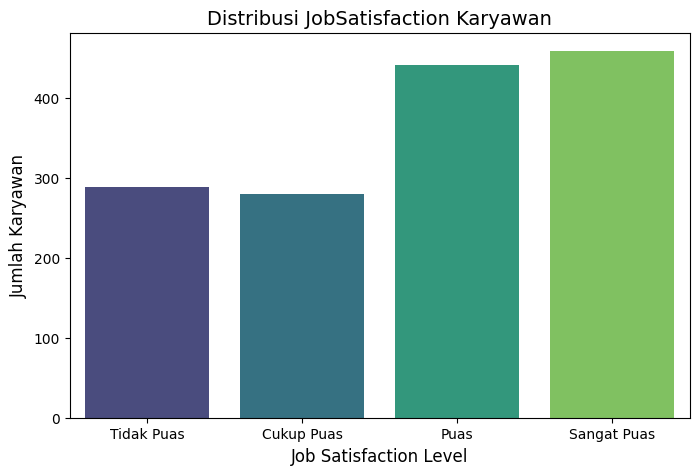

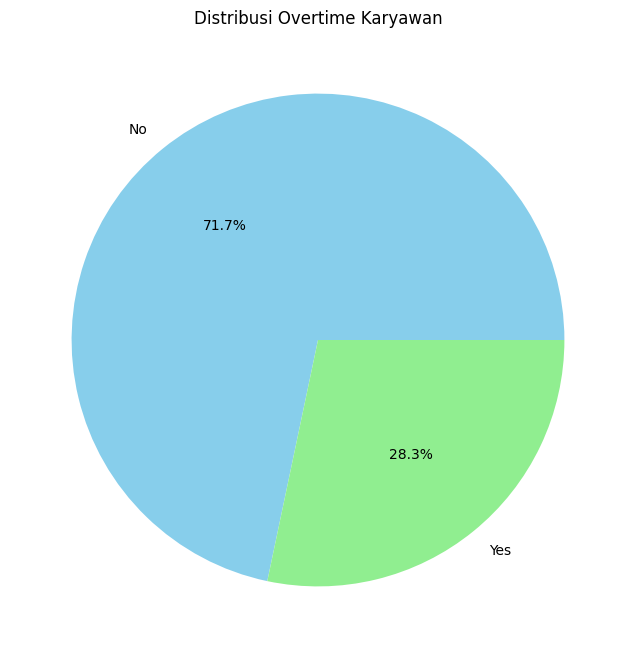

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('employee_data.csv')

# Plot distribusi JobSatisfaction
plt.figure(figsize=(8, 5))
sns.countplot(x=df['JobSatisfaction'], palette="viridis")

# Judul dan label
plt.title("Distribusi JobSatisfaction Karyawan", fontsize=14)
plt.xlabel("Job Satisfaction Level", fontsize=12)
plt.ylabel("Jumlah Karyawan", fontsize=12)
plt.xticks([0, 1, 2, 3], ["Tidak Puas", "Cukup Puas", "Puas", "Sangat Puas"])
plt.show()

# Plot distribusi OverTime as pie chart
plt.figure(figsize=(8, 8))
df['OverTime'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Overtime Karyawan')
plt.ylabel('')  # Hide the y-label
plt.show()

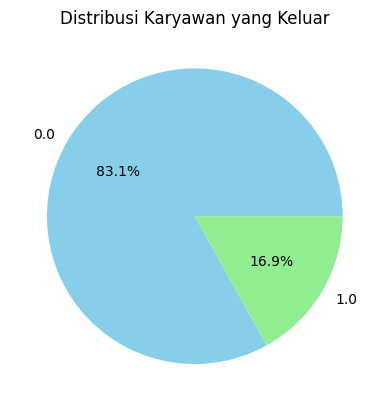

In [64]:
df['Attrition'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribusi Karyawan yang Keluar')
plt.ylabel('')  # Hide the y-label
plt.show()